In [1]:
#Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importing and reading the 'Country-data.csv' dataset
df = pd.read_csv(r"Country-data.csv")
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


Exploring the Data

In [3]:
df.shape

(167, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [5]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [6]:
#Checking the presence of any null values in the dataset.
round(100*(df.isnull().sum())/(df.shape[1]),2)

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

Therefore, none of the columns have any kind of null values

The columns 'exports', 'imports' and 'health' in the given dataset are in terms of % of total GDP of the country. We need to convert them to real values and per capita terms. That is, we need to convert them to 'exports per capita','imports per capita' and 'health spending per capita'. 

To do this, we need to multiply 'exports' with GDP of the country and divide by the population.

exports per capita = %export * GDP / population
                   
               = %export * gdpp
                   
Similarly, we can calculate the other two also.

In [7]:
df['exports_per_capita'] = df['exports'] * df['gdpp']
df['imports_per_capita'] = df['imports'] * df['gdpp']
df['health_spending_per_capita'] = df['health'] * df['gdpp']

#Now we drop the initial 'exports', 'imports' and 'health' columns from the dataset
df.drop(columns=['exports','imports','health'], inplace = True)

In [8]:
df.nlargest(5,['inflation'])

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,exports_per_capita,imports_per_capita,health_spending_per_capita
113,Nigeria,130.0,5150,104.0,60.5,5.84,2330,58949.0,40542.0,11813.1
163,Venezuela,17.1,16500,45.9,75.4,2.47,13500,384750.0,237600.0,66285.0
103,Mongolia,26.1,7710,39.2,66.2,2.64,2650,123755.0,150255.0,14416.0
149,Timor-Leste,62.6,1850,26.5,71.1,6.23,3600,7920.0,100080.0,32832.0
49,Equatorial Guinea,111.0,33700,24.9,60.9,5.21,17100,1467180.0,1007190.0,76608.0


Also if you see the inflation rate of Nigeria, we can see that it is 104%. That is not a proper inflation rate for a country. It is highly probable that it is typing error and we can correct it to 14%. A quick google search also indicates that the inflation rates in Nigeria has been around 5%-20% in the past 10-20 years. Also the maximum inflation rate ever in Nigeria was also 70%. Never anywhere near 104%.

In [9]:
df.loc[df['country']=='Nigeria', 'inflation'] = 14.0

Plotting boxplots for all the numeric columns to check any presence of outliers

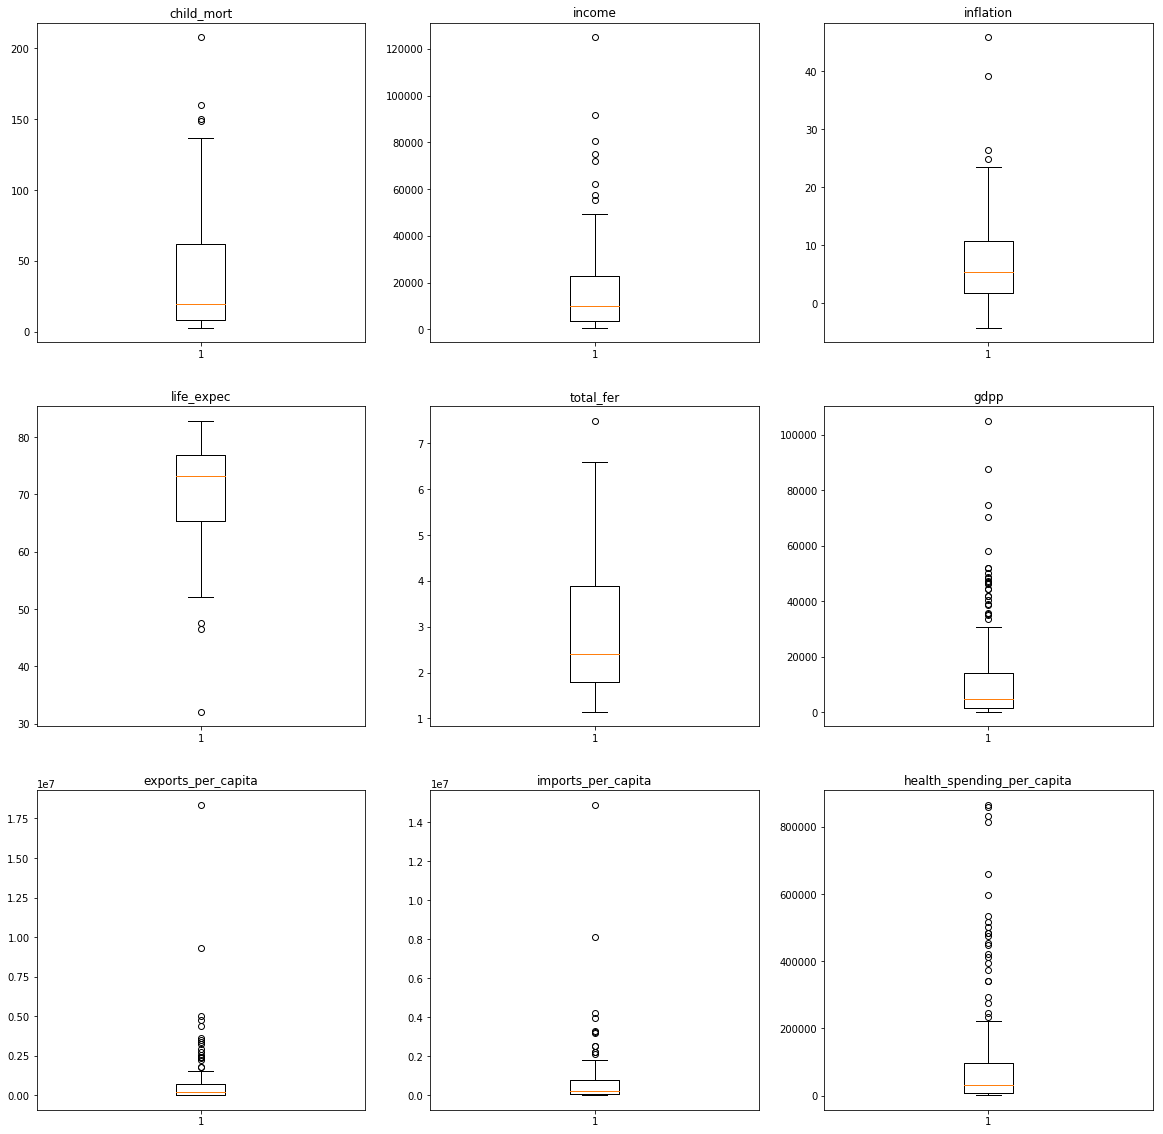

In [10]:
plt.figure(figsize=(20,20))
#creating a list, col, which will contain names of all the columns for which boxplot needs to be plotted
col = list(df.columns)
col.remove('country')

#plotting the box plot now
for i in range(1,len(col)+1):
    plt.subplot(3,3,i)
    plt.boxplot(df[col[i-1]])
    plt.title(col[i-1])

1. 'child_mort', 'inflation' and 'total_fert' has some outliers. But if we remove these outliers, we might lose the nation which needs the aid money the most. Therefore we will let the outliers in this columns be.
2. 'income', 'gdpp', 'exports_per_capita', 'imports_per_capita' and 'health_spending_per_capita' has outliers on the higher side. These are the countries which are rich already and do not need any kind of aid. Therefore we can remove outliers from these.
3. 'life_expec' has outliers on the lower side which again are countries in need of aid. Therfore we will not remove these outliers.

In [11]:
#Seperating the columns for which we will remove the outliers and storing them in a list, 'col'
col = ['income','gdpp','exports_per_capita','imports_per_capita','health_spending_per_capita']

#Removing the values which are higher than the 95th percentile of the value as these are the Top 5 percentile countries
#in the world. Hence these don't need any kind of aid.
for i in col:
    Q3 = df[i].quantile(q=0.95)
    df = df.loc[df[i]<Q3]

In [12]:
df.shape

(127, 10)

We have removed around 40 countries from our list. But as they were the top performing nations of the world and we need to find the countries in need of aid, removing them won't be a problem.

In [13]:
df.describe()

,child_mort,income,inflation,life_expec,total_fer,gdpp,exports_per_capita,imports_per_capita,health_spending_per_capita
count,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,1.270000e+02,1.270000e+02,127.000000
mean,47.698425,8871.362205,8.604591,67.822047,3.292835,4435.543307,1.888064e+05,1.952829e+05,27822.106378
std,40.984227,8048.976562,7.539322,8.269354,1.544980,4230.520846,2.422634e+05,2.074263e+05,27914.947779
min,4.500000,609.000000,-0.812000,32.100000,1.250000,231.000000,1.076920e+02,6.510920e+01,1282.120000
25%,16.600000,2460.000000,2.925000,61.750000,2.105000,1020.000000,2.699100e+04,4.002865e+04,5399.675000
50%,31.900000,6710.000000,6.810000,69.700000,2.710000,3040.000000,1.007400e+05,1.393340e+05,17739.000000
75%,69.350000,13150.000000,12.400000,74.500000,4.605000,6440.000000,2.476210e+05,2.565295e+05,41900.100000
max,208.000000,45400.000000,45.900000,80.400000,7.490000,19300.000000,1.268010e+06,1.003020e+06,104760.000000


As we can see, various column's values are in various scales. We need to scale them all in a similar scale. As we have removed outliers from our data, we can use standard scaler to scale our values

In [14]:
#Storing our original dataset df into another dataset init_df so that it can be used later.
init_df = df.copy()

#Before scaling, we need to seperate any column whose values are not numeric. Therefore we store the country column values in
#variable, y.
y = df['country']

In [15]:
#importing the StandardScaler library from the sklearn
from sklearn.preprocessing import StandardScaler

#instantiating the StandardScaler() class
standard_scaler = StandardScaler()

df_scaled = standard_scaler.fit_transform(df.drop(columns=['country'])) #Storing the scaled values in df_scaled

C:\Users\shara\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\shara\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [16]:
df_scaled.shape

(127, 9)

Now our dataframe is ready for PCA. Lets perform PCA of the data now.

In [17]:
#importing PCA library from sklearn
from sklearn.decomposition import PCA

In [18]:
#instantiating PCA class with random_state=100
pca = PCA(svd_solver='randomized', random_state=100)

#fitting our scaled data in PCA
pca.fit(df_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=100,
  svd_solver='randomized', tol=0.0, whiten=False)

In [19]:
#Taking a look at the new basis vectors
pca.components_

array([[-0.33243065,  0.37759385, -0.04083137,  0.31569256, -0.31609229,
         0.38777055,  0.35696152,  0.36873071,  0.36320731],
       [ 0.43064146,  0.25227374,  0.40301702, -0.40894065,  0.4320088 ,
         0.25685869,  0.35477576,  0.17848428,  0.10449996],
       [-0.23571265,  0.05483803,  0.87183332,  0.26972425, -0.10237102,
        -0.0024128 , -0.14967828, -0.26264615, -0.08194876],
       [ 0.15951061, -0.03911843, -0.00122171, -0.25148416, -0.20182297,
         0.23604489, -0.43393908, -0.31596258,  0.7247035 ],
       [ 0.04109994,  0.0651102 ,  0.11870268, -0.57096772, -0.74192351,
        -0.1048776 ,  0.1247821 ,  0.08572721, -0.26383224],
       [ 0.20626541,  0.66920752, -0.23068992,  0.12366943, -0.0506445 ,
         0.21380749, -0.05055796, -0.53902985, -0.31577857],
       [ 0.75860191, -0.160669  ,  0.07752705,  0.50557305, -0.32291052,
        -0.08614863,  0.0611653 ,  0.14249548,  0.03681174],
       [-0.05663815, -0.3810523 , -0.04675998,  0.01437589, -0

In [20]:
#Checking the variance of each of the principle components
pca.explained_variance_ratio_

array([0.65009671, 0.13255767, 0.11443691, 0.0356377 , 0.03181908,
       0.01858484, 0.0114081 , 0.00344287, 0.00201611])

<BarContainer object of 9 artists>

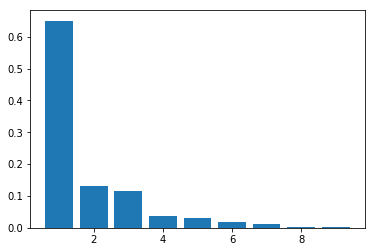

In [21]:
#Plotting barplot to visualize the variance explained by each of the PC
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)

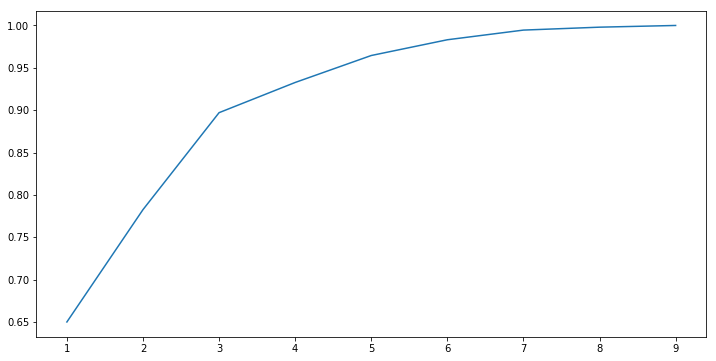

In [22]:
#Plotting a Scree plot

var_cumu = np.cumsum(pca.explained_variance_ratio_) #creating cumulative sum of explained_variance_ratio
plt.figure(figsize=(12,6))
plt.plot(range(1,len(var_cumu)+1), var_cumu) #plotting the cumulative sum

3 PC explain about 90% of the variance. The 4th PC explains just about 3% and hence is not that important. Therefore we can select the first 3 principle components.

In [23]:
#Performing PCA again of df_scaled but this time selecting only 3 components.
pca2 = PCA(n_components=3, random_state=100) #Initializing PCA into pca2 with n_components=3

In [24]:
#Fitting and transforming the data and storing it in newdata
newData = pca2.fit_transform(df_scaled)

In [25]:
newData.shape

(127, 3)

In [26]:
#Creating a dataframe with the transformed values.
df_pca = pd.DataFrame(newData, columns=["PC1", "PC2","PC3"])
df_pca.head()

,PC1,PC2,PC3
0,-2.898456,0.808978,-0.344547
1,0.838911,-1.528820,0.140909
2,0.487670,-0.336782,1.434771
3,-2.028049,2.473223,0.815273
4,4.196024,0.406465,-1.206225


In [27]:
#Add the country column back here before you proceed further.
df_pca.insert(loc=0, column='country', value=y)
df_pca.head()

,country,PC1,PC2,PC3
0,Afghanistan,-2.898456,0.808978,-0.344547
1,Albania,0.838911,-1.528820,0.140909
2,Algeria,0.487670,-0.336782,1.434771
3,Angola,-2.028049,2.473223,0.815273
4,Antigua and Barbuda,4.196024,0.406465,-1.206225


In [28]:
df_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 4 columns):
country    98 non-null object
PC1        127 non-null float64
PC2        127 non-null float64
PC3        127 non-null float64
dtypes: float64(3), object(1)
memory usage: 4.0+ KB


In [29]:
df_pca.shape

(127, 4)

Therefore df_pca is the dataset which is what we get after we are finished with the PCA.

# Performing Clustering 

Now we will perform clustering (both KMeans and Hierarchical) on te data df_pca

Before we dive into clustering, we should check whether our data is suitable for clustering. We do that by finding out the Hopkin's Statistic which will give us the value indicating the clustering tendency of our data

In [30]:
#importing the libraries required to find the Hopkin's statistic value.
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
#defining a function hopkins() which will take a dataset as input and will give the Hopkin's statistic value as output
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) # heuristic from article [1]
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [31]:
#Calling the function hopkins() and passing our dataset as argument
hopkins(df_pca.drop(columns='country'))

0.7981293335473056

We got 0.818 as the Hopkin's statistic value. Therefore the clustering tendency of our data is good. Hence we can carry out our clustering activity

In [32]:
#Taking a look at our data again.
df_pca.head()

,country,PC1,PC2,PC3
0,Afghanistan,-2.898456,0.808978,-0.344547
1,Albania,0.838911,-1.528820,0.140909
2,Algeria,0.487670,-0.336782,1.434771
3,Angola,-2.028049,2.473223,0.815273
4,Antigua and Barbuda,4.196024,0.406465,-1.206225


We need to seperate the country column again.

In [33]:
df_cluster = df_pca.copy()
df_cluster.drop(columns='country', inplace=True)

In [34]:
df_cluster.head()

,PC1,PC2,PC3
0,-2.898456,0.808978,-0.344547
1,0.838911,-1.528820,0.140909
2,0.487670,-0.336782,1.434771
3,-2.028049,2.473223,0.815273
4,4.196024,0.406465,-1.206225


# KMeans clustering

As we don't know what should K be in our Kmeans clustering, we will perform Silhouette Score analysis and Elbow Curve analysis to select a proper value for K.

Plotting the Silhouette Score values in a lineplot.

In [35]:
#Importing the required libraries to perform silhouette score analysis
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#range_n_clusters contain the different values of k we need to test
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_cluster)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df_cluster, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    
    

For n_clusters=2, the silhouette score is 0.40529393780490375
For n_clusters=3, the silhouette score is 0.4090528431301386
For n_clusters=4, the silhouette score is 0.36462429676933134
For n_clusters=5, the silhouette score is 0.37163595774352104
For n_clusters=6, the silhouette score is 0.31568753820967665
For n_clusters=7, the silhouette score is 0.32724562975751836
For n_clusters=8, the silhouette score is 0.32221683512448146


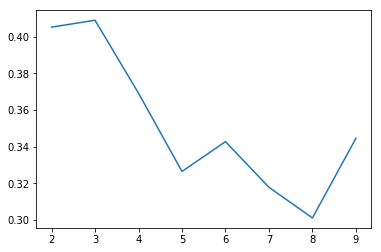

In [36]:
ss = []
for k in range(2,10):
    kmeans = KMeans(n_clusters=k).fit(df_cluster)
    ss.append([k, silhouette_score(df_cluster, kmeans.labels_)])
plt.plot(pd.DataFrame(ss)[0], pd.DataFrame(ss)[1])

The silhoutte score is maximum for the k=2 and k=3 but k=4 might also be a good choice. K=2 is most probably a bad idea as we will get only 2 clusters. We will do kmeans clustering for both k=3, K=4. But lets analyse the elbow curve too.

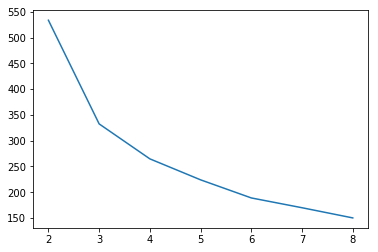

In [37]:
#Elbow Curve

#We will store the kmeans.inertia_ values for all different k in a list called ssd
ssd = []

#range_n_clusters contain the different values of k we need to test
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_cluster)
    
    ssd.append(kmeans.inertia_) #appending the kmeans.inertia for k=num_clusters in ssd
    
# plot the SSDs for each n_clusters
plt.plot(list(range(2,9)), ssd)

At k=3 we get the steepest elbow curve. Therefore we will select k=3 as the number of clusters.

### We will now perform Kmeans clustering with 3 and 4 clusters on the dataset.

Let's start with k=4 clusters

In [38]:
k=4  # final model with k=3

#Creating an instance of Kmeans and fitting the data into it.
kmeans = KMeans(n_clusters=k, max_iter=50)
kmeans.fit(df_cluster)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [39]:
#Kmeans.labels_ gives us the clusters each row has been assigned.
kmeans.labels_

array([3, 0, 0, 3, 1, 2, 0, 2, 0, 2, 0, 3, 0, 0, 2, 2, 2, 2, 3, 3, 0, 3,
       0, 3, 3, 1, 0, 2, 3, 3, 3, 2, 3, 1, 0, 0, 0, 0, 3, 1, 0, 2, 3, 0,
       3, 2, 0, 3, 3, 0, 3, 1, 0, 0, 2, 0, 0, 0, 2, 3, 3, 0, 3, 1, 2, 3,
       3, 1, 1, 2, 3, 3, 1, 2, 3, 3, 2, 0, 0, 0, 2, 0, 3, 0, 0, 0, 3, 3,
       1, 3, 1, 0, 0, 0, 1, 2, 2, 3, 0, 1, 3, 2, 3, 0, 2, 0, 2, 3, 2, 0,
       3, 2, 3, 3, 0, 0, 2, 0, 3, 0, 2, 0, 0, 2, 0, 3, 3])

In [40]:
#Getting the country, child_mort, income and gdpp columns from init_df and creating a new dataframe init_df_kmeans.
init_df_kmeans = init_df[['country','child_mort','income','gdpp']].copy()

#Adding a new column to init_df_kmeans called cluster where we will store the kmeans.labels_ values.
init_df_kmeans['cluster'] = kmeans.labels_

#ALso adding the cluster id of df_pca dataframe too.
df_pca['cluster_kmeans'] = kmeans.labels_

init_df_kmeans.head()

,country,child_mort,income,gdpp,cluster
0,Afghanistan,90.2,1610,553,3
1,Albania,16.6,9930,4090,0
2,Algeria,27.3,12900,4460,0
3,Angola,119.0,5900,3530,3
4,Antigua and Barbuda,10.3,19100,12200,1


In [41]:
init_df_kmeans[init_df_kmeans['cluster'] == 0].head()

,country,child_mort,income,gdpp,cluster
1,Albania,16.6,9930,4090,0
2,Algeria,27.3,12900,4460,0
6,Armenia,18.1,6700,3220,0
12,Bangladesh,49.4,2440,758,0
16,Belize,18.8,7880,4340,0


In [42]:
init_df_kmeans[init_df_kmeans['cluster'] == 1].head()

,country,child_mort,income,gdpp,cluster
4,Antigua and Barbuda,10.3,19100,12200,1
33,Chile,8.7,19400,12900,1
41,Croatia,5.5,20100,13500,1
51,Estonia,4.5,22700,14600,1
67,Hungary,6.0,22300,13100,1


In [43]:
init_df_kmeans[init_df_kmeans['cluster'] == 2].head()

,country,child_mort,income,gdpp,cluster
5,Argentina,14.5,18700,10300,2
9,Azerbaijan,39.2,16000,5840,2
14,Belarus,5.5,16200,6030,2
20,Bosnia and Herzegovina,6.9,9720,4610,2
21,Botswana,52.5,13300,6350,2


In [44]:
init_df_kmeans[init_df_kmeans['cluster'] == 3].head()

,country,child_mort,income,gdpp,cluster
0,Afghanistan,90.2,1610,553,3
3,Angola,119.0,5900,3530,3
17,Benin,111.0,1820,758,3
25,Burkina Faso,116.0,1430,575,3
26,Burundi,93.6,764,231,3


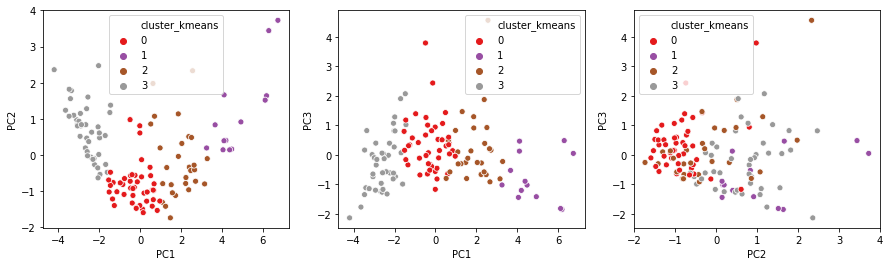

In [45]:
#Plotting scatter plot to visualize how the PC1, PC2 and PC3 vary with each other for various clusters.
#Here we plot for clusters generated with KMeans clustering

plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
sns.scatterplot(x='PC1', y='PC2', hue='cluster_kmeans', data=df_pca, palette='Set1')
plt.subplot(1,3,2)
sns.scatterplot(x='PC1', y='PC3', hue='cluster_kmeans', data=df_pca, palette='Set1')
plt.subplot(1,3,3)
sns.scatterplot(x='PC2', y='PC3', hue='cluster_kmeans', data=df_pca, palette='Set1')

In this,
1. Cluster 0 represents developing countries (near to underdeveloped side)
2. Cluster 1 represents developing countries (near to developed side)
3. Cluster 2 represents underdeveloped countries
4. Cluster 3 represents developed countries

Now lets try with k=3

#### Now for K=3

In [46]:
k=3  # final model with k=3

#Creating an instance of Kmeans and fitting the data into it.
kmeans = KMeans(n_clusters=k, max_iter=50)
kmeans.fit(df_cluster)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [47]:
#Kmeans.labels_ gives us the clusters each row has been assigned.
kmeans.labels_

array([1, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 2, 1, 1, 0, 1,
       0, 1, 1, 2, 0, 0, 1, 1, 1, 2, 1, 2, 0, 0, 0, 0, 1, 2, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 2, 0, 0, 0, 0, 0, 0, 2, 1, 1, 0, 1, 2, 2, 1,
       1, 2, 2, 0, 1, 1, 2, 2, 1, 1, 2, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1, 1,
       2, 1, 2, 0, 0, 0, 2, 2, 2, 1, 0, 2, 1, 0, 1, 1, 0, 0, 0, 1, 2, 0,
       1, 0, 1, 1, 0, 0, 2, 0, 1, 0, 2, 0, 0, 2, 0, 1, 1])

In [48]:
#Getting the country, child_mort, income and gdpp columns from init_df and creating a new dataframe init_df_kmeans.
init_df_kmeans = init_df[['country','child_mort','income','gdpp']].copy()

#Adding a new column to init_df_kmeans called cluster where we will store the kmeans.labels_ values.
init_df_kmeans['cluster'] = kmeans.labels_

#ALso adding the cluster id of df_pca dataframe too.
df_pca['cluster_kmeans'] = kmeans.labels_

init_df_kmeans.head()

,country,child_mort,income,gdpp,cluster
0,Afghanistan,90.2,1610,553,1
1,Albania,16.6,9930,4090,0
2,Algeria,27.3,12900,4460,0
3,Angola,119.0,5900,3530,1
4,Antigua and Barbuda,10.3,19100,12200,2


Therefore we now have added the cluster number for each and every country from our initial dataset. Now lets see which cluster id has the group of countries which needs aid the most.

In [49]:
init_df_kmeans[init_df_kmeans['cluster'] == 1]

,country,child_mort,income,gdpp,cluster
0,Afghanistan,90.2,1610,553,1
3,Angola,119.0,5900,3530,1
17,Benin,111.0,1820,758,1
25,Burkina Faso,116.0,1430,575,1
26,Burundi,93.6,764,231,1
28,Cameroon,108.0,2660,1310,1
31,Central African Republic,149.0,888,446,1
32,Chad,150.0,1930,897,1
36,Comoros,88.2,1410,769,1
37,"Congo, Dem. Rep.",116.0,609,334,1


We have done KMeans clustering for K=4 and K=3. The cluster with underdeveloped countries remiain pretty same in both the different K. The extra cluster in K=4 clusters is made by dividing the developed countries cluster of K=3 cluster KMeans.

As silhouette score and Elbow curve suggests for K=3, we will move ahead with K=3. Therefore from now, clusters mentioned will of kmeans with k=3 clusters.

As we can see that the cluster 1 has the most underdeveloped countries clustered.

### Hierarchical Clustering

In [50]:
#Importing the libraries need for Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [51]:
df_cluster.head()

,PC1,PC2,PC3
0,-2.898456,0.808978,-0.344547
1,0.838911,-1.528820,0.140909
2,0.487670,-0.336782,1.434771
3,-2.028049,2.473223,0.815273
4,4.196024,0.406465,-1.206225


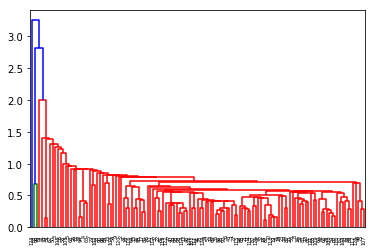

In [52]:
#PLotting the dendogram which method='single'
mergings = linkage(df_cluster, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

The dendogram is not structured properly. There is no proper tree structure. So lets try linkage method as 'complete'

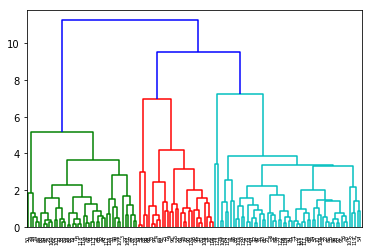

In [53]:
#plotting the dendogram with method='complete'
mergings = linkage(df_cluster, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

Looking at the dendogram, 3 clusters are making the most sense. Therefore we will choose 3 clusters.

In [54]:
# 3 clusters
#We will cut the tree where number of clusters =3.
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 1, 1, 0, 2, 2, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 2, 2, 0, 0, 1, 0,
       1, 0, 0, 2, 1, 1, 0, 0, 0, 2, 0, 2, 1, 1, 1, 1, 0, 2, 1, 1, 0, 1,
       0, 2, 1, 0, 0, 1, 0, 2, 1, 1, 1, 1, 1, 1, 2, 0, 0, 1, 0, 2, 2, 0,
       0, 2, 2, 1, 0, 0, 2, 2, 0, 0, 2, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0, 0,
       2, 0, 2, 1, 1, 1, 2, 2, 2, 0, 1, 2, 0, 1, 0, 0, 1, 1, 1, 0, 2, 1,
       0, 1, 0, 0, 1, 1, 2, 1, 0, 1, 2, 1, 1, 1, 1, 0, 0])

In [55]:
#Getting the country, child_mort, income and gdpp columns from init_df and creating a new dataframe init_df_hierar.
init_df_hierar = init_df[['country','child_mort','income','gdpp']].copy()

#creating a new column cluster where we add the cluster_labels values.
init_df_hierar['cluster'] = cluster_labels

#ALso adding the cluster id of df_pca dataframe too.
df_pca['cluster_hierar'] = cluster_labels

In [56]:
#Taking a look at countries which are present in cluster 1
init_df_hierar[init_df_hierar['cluster']==1]

,country,child_mort,income,gdpp,cluster
1,Albania,16.6,9930,4090,1
2,Algeria,27.3,12900,4460,1
6,Armenia,18.1,6700,3220,1
9,Azerbaijan,39.2,16000,5840,1
12,Bangladesh,49.4,2440,758,1
16,Belize,18.8,7880,4340,1
18,Bhutan,42.7,6420,2180,1
19,Bolivia,46.6,5410,1980,1
20,Bosnia and Herzegovina,6.9,9720,4610,1
21,Botswana,52.5,13300,6350,1


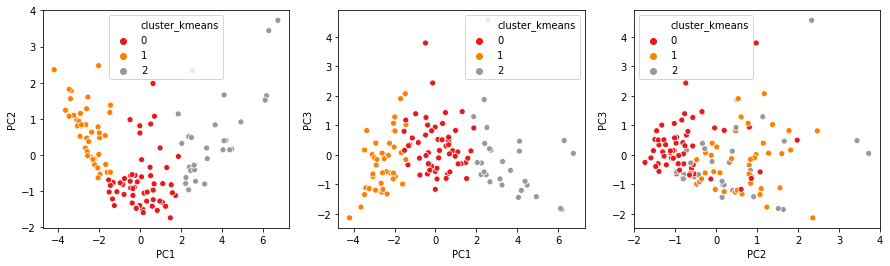

In [57]:
#Plotting scatter plot to visualize how the PC1, PC2 and PC3 vary with each other for various clusters.
#Here we plot for clusters generated with KMeans clustering

plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
sns.scatterplot(x='PC1', y='PC2', hue='cluster_kmeans', data=df_pca, palette='Set1')
plt.subplot(1,3,2)
sns.scatterplot(x='PC1', y='PC3', hue='cluster_kmeans', data=df_pca, palette='Set1')
plt.subplot(1,3,3)
sns.scatterplot(x='PC2', y='PC3', hue='cluster_kmeans', data=df_pca, palette='Set1')

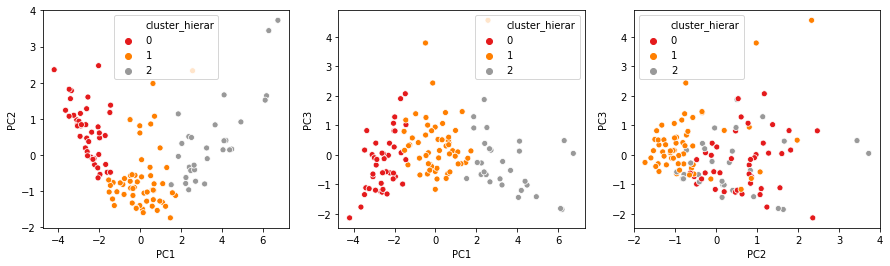

In [58]:
#Plotting scatter plot to visualize how the PC1, PC2 and PC3 vary with each other for various clusters.
#Here we plot for clusters generated with Hierarchical clustering

plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
sns.scatterplot(x='PC1', y='PC2', hue='cluster_hierar', data=df_pca, palette='Set1')
plt.subplot(1,3,2)
sns.scatterplot(x='PC1', y='PC3', hue='cluster_hierar', data=df_pca, palette='Set1')
plt.subplot(1,3,3)
sns.scatterplot(x='PC2', y='PC3', hue='cluster_hierar', data=df_pca, palette='Set1')

Both the clustering techniques have given us similar results in terms of clustering the countries. Hence we can choose anyone.
Therefore lets select kmeans clustering as our clustering algorithm. 

Also lets see which clusters can be classified as underdeveloped, developed, and developing.

In [59]:
#Checking the countries present in cluster 0
init_df_kmeans[init_df_kmeans['cluster'] == 0]

,country,child_mort,income,gdpp,cluster
1,Albania,16.6,9930,4090,0
2,Algeria,27.3,12900,4460,0
6,Armenia,18.1,6700,3220,0
9,Azerbaijan,39.2,16000,5840,0
12,Bangladesh,49.4,2440,758,0
14,Belarus,5.5,16200,6030,0
16,Belize,18.8,7880,4340,0
18,Bhutan,42.7,6420,2180,0
19,Bolivia,46.6,5410,1980,0
20,Bosnia and Herzegovina,6.9,9720,4610,0


In [60]:
#Checking the countries present in cluster 1
init_df_kmeans[init_df_kmeans['cluster'] == 1]

,country,child_mort,income,gdpp,cluster
0,Afghanistan,90.2,1610,553,1
3,Angola,119.0,5900,3530,1
17,Benin,111.0,1820,758,1
25,Burkina Faso,116.0,1430,575,1
26,Burundi,93.6,764,231,1
28,Cameroon,108.0,2660,1310,1
31,Central African Republic,149.0,888,446,1
32,Chad,150.0,1930,897,1
36,Comoros,88.2,1410,769,1
37,"Congo, Dem. Rep.",116.0,609,334,1


In [61]:
#Checking the countries present in cluster 2
init_df_kmeans[init_df_kmeans['cluster'] == 2]

,country,child_mort,income,gdpp,cluster
4,Antigua and Barbuda,10.3,19100,12200,2
5,Argentina,14.5,18700,10300,2
22,Brazil,19.8,14500,11200,2
24,Bulgaria,10.8,15300,6840,2
33,Chile,8.7,19400,12900,2
39,Costa Rica,10.2,13000,8200,2
41,Croatia,5.5,20100,13500,2
51,Estonia,4.5,22700,14600,2
67,Hungary,6.0,22300,13100,2
79,Kazakhstan,21.5,20100,9070,2


As you can see,
1. Cluster 0 represents the countries which are developing.
2. Cluster 1 represents the countries which are underdeveloped
3. Cluster 2 represents the countries which are developing and developed.

We need to target the underdeveloped countries, i.e., we need to target the countries which are in cluster 1

Plotting the scatter plot of PC1, PC2 and PC3 from kmeans again.

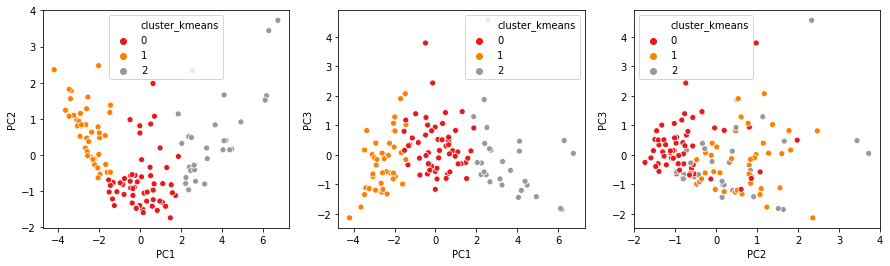

In [62]:
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
sns.scatterplot(x='PC1', y='PC2', hue='cluster_kmeans', data=df_pca, palette='Set1')
plt.subplot(1,3,2)
sns.scatterplot(x='PC1', y='PC3', hue='cluster_kmeans', data=df_pca, palette='Set1')
plt.subplot(1,3,3)
sns.scatterplot(x='PC2', y='PC3', hue='cluster_kmeans', data=df_pca, palette='Set1')

Now if we take a look at the scatter plot between PC1 and PC2, we can see that the countries in the cluster id 1, have the least values of PC1 and somewhat moderate to high values of PC2. These are the countries which need the aid the most. Lets see what the child_mort and gdpp have to say about this.

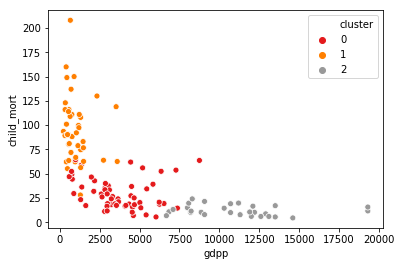

In [63]:
#Plotting scatter plot for gdpp and child_mort for various clusters
sns.scatterplot(x='gdpp', y='child_mort', hue='cluster', data=init_df_kmeans, palette='Set1')

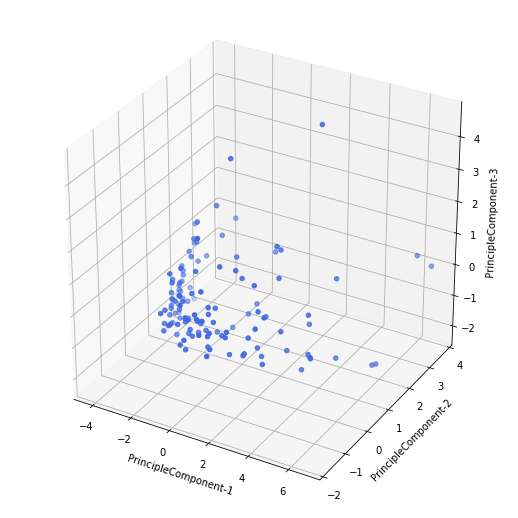

In [64]:
#importing the mpl_toolkits to plot a 3D scatter plot
from mpl_toolkits.mplot3d import Axes3D

#difining our figure
fig = plt.figure(figsize=(7,7))
ax = Axes3D(fig)

#definign the x, y and z axis as PC1, PC2, and PC3
x = list(df_pca['PC1'])
y = list(df_pca['PC2'])
z = list(df_pca['PC3'])

#define the axis labels
ax.set_xlabel('PrincipleComponent-1')
ax.set_ylabel('PrincipleComponent-2')
ax.set_zlabel('PrincipleComponent-3')

#Plotting the scatter plot
ax.scatter(x,y,z, c='royalBlue', marker='o')

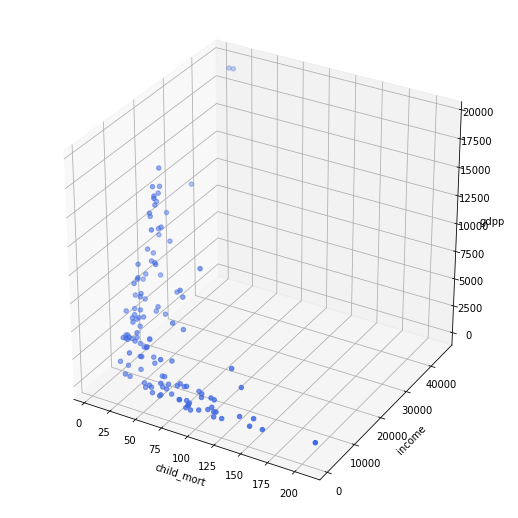

In [65]:
#difining our figure
fig = plt.figure(figsize=(7,7))
ax = Axes3D(fig)

#definign the x, y and z axis as child_mort, income, and gdpp
x = list(init_df_kmeans['child_mort'])
y = list(init_df_kmeans['income'])
z = list(init_df_kmeans['gdpp'])

#define the axis labels
ax.set_xlabel('child_mort')
ax.set_ylabel('income')
ax.set_zlabel('gdpp')

#Plotting the scatter plot
ax.scatter(x,y,z, c='royalBlue', marker='o')

If you look at the 3D graph above with PC1, PC2 and PC3 as the x, y and z axis, you can see that the cluster PC1 in range (-5,-2), PC2 in range (1,3) and PC3 in range (-3, 0) are the once which are the cluster 1. These are the nations which need the aid most.

In [66]:
init_df_kmeans[init_df_kmeans['cluster']==1].shape

(42, 5)

There are 42 countries which fall in this cluster and we cannot recommend 42 countries. Therefore out of these, lets select the top 10 countries which need the aid most. We can use many types of parameters to decide which country to choose as all countries in cluster 1 are in need to aid. Therefore we will choose gdp per capita as our parameter and the bottom 10 nations which have the lowest gdp per capita among the underdeveloped countries will be a good choice to give aid.

In [67]:
final_list = init_df_kmeans.nsmallest(10, 'gdpp').country
final_list

26                      Burundi
88                      Liberia
37             Congo, Dem. Rep.
112                       Niger
132                Sierra Leone
93                   Madagascar
106                  Mozambique
31     Central African Republic
94                       Malawi
50                      Eritrea
Name: country, dtype: object

These above countries have the lowest GDP per capita among these underdeveloped countries.